In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings(action="ignore")

F:\Anaconda\AnacondaFiles\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_train = pd.read_csv("train.csv")
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [105]:
df_train.shape

(1460, 81)

Totally there are 1460 records(samples) with 80 independent features and 1 dependent feature(SalePrice)

In [106]:
trainId= df_train['Id']
trainId

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [107]:
# Id column is just a unique identifier and we don't want to perform any numerical operations on it.
# So dropping that feature.
df_train.drop('Id',axis=1,inplace=True)

In [108]:
# Get the descriptive statistics of these features
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [109]:
# To get the numerical_features
numerical_features = df_train.describe().columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [110]:
# These 4 features are related to years(temporal features)
year_features = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for feature in year_features:
    print(f'{feature}: {df_train[feature].nunique()}')

YearBuilt: 112
YearRemodAdd: 61
GarageYrBlt: 97
YrSold: 5


In [111]:
# Since these year features are like categories, we can remove them from numerical features
numerical_features = numerical_features.drop(year_features+['SalePrice'])
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold'],
      dtype='object')

In [112]:
# categorical_features = [feature for feature in df_train.columns if feature not in list(numerical_features) + year_features + ['SalePrice']]
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtype=='O']
print(f'No.of categorical features: {len(categorical_features)}')
categorical_features

No.of categorical features: 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

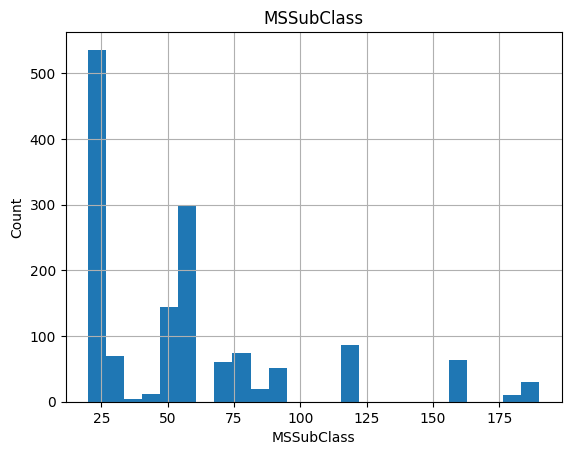

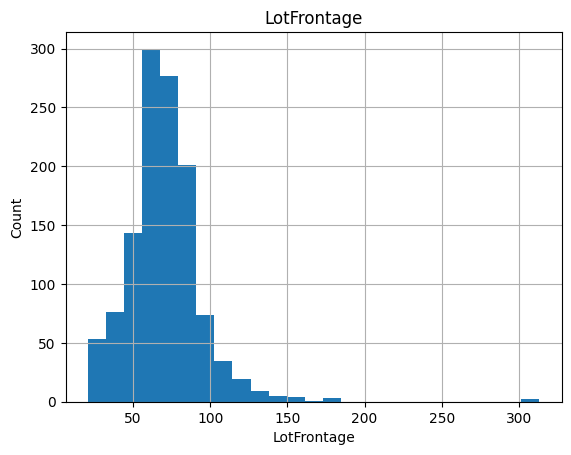

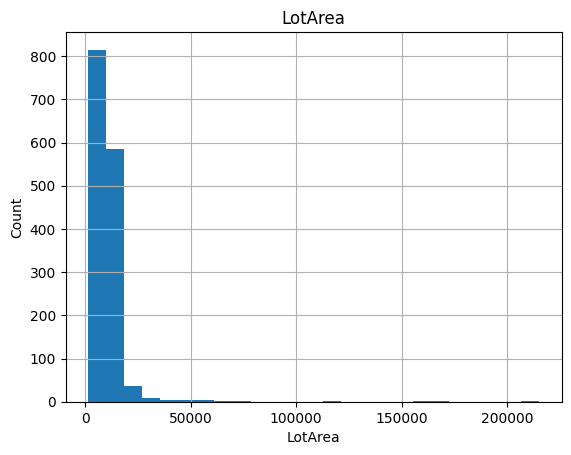

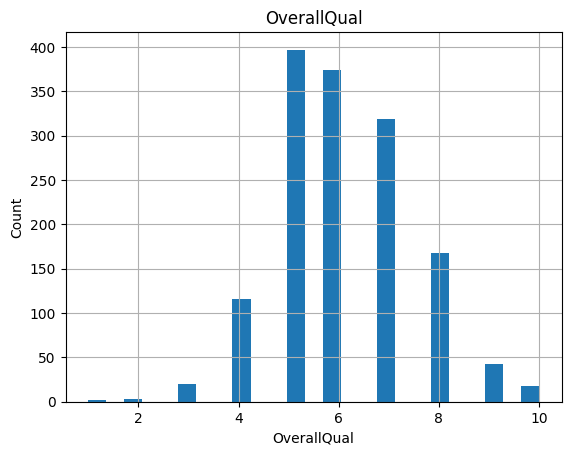

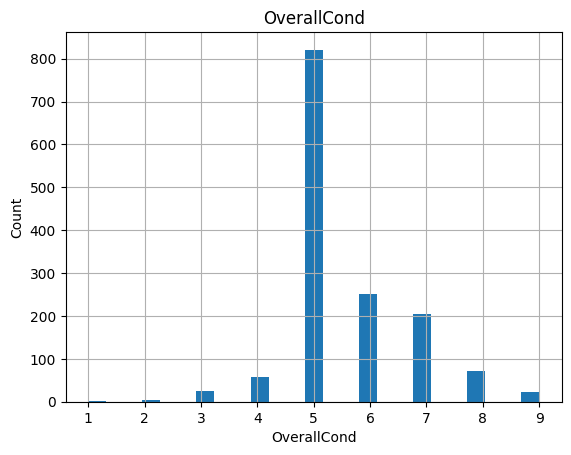

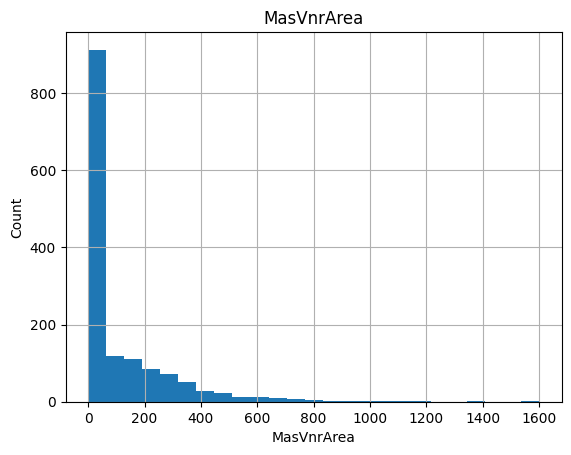

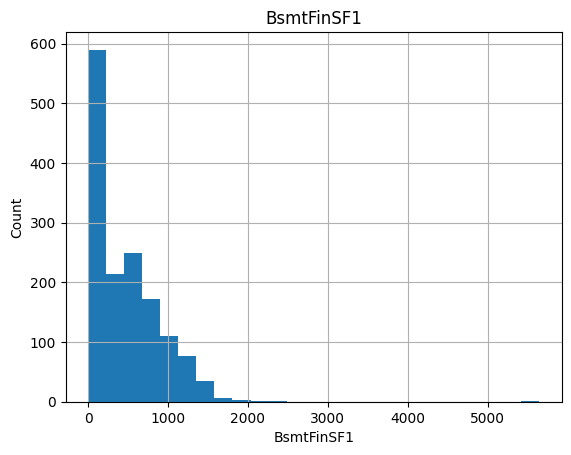

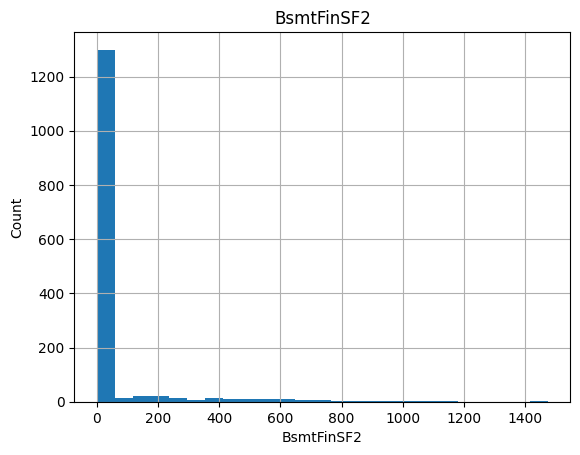

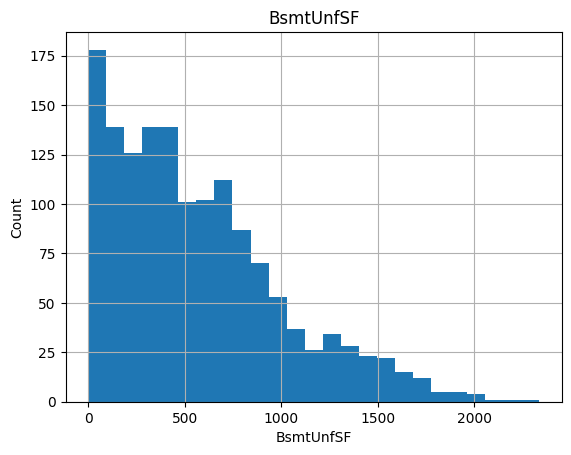

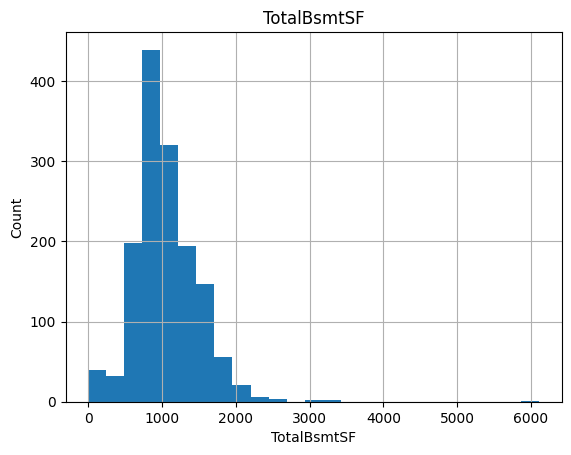

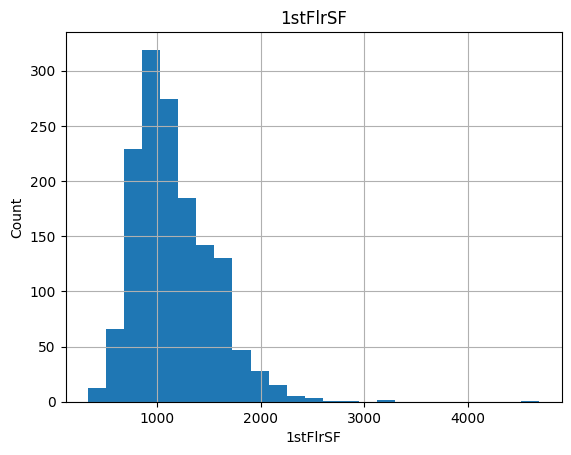

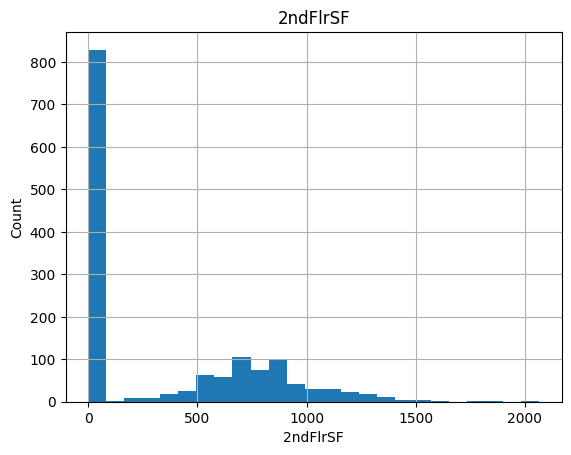

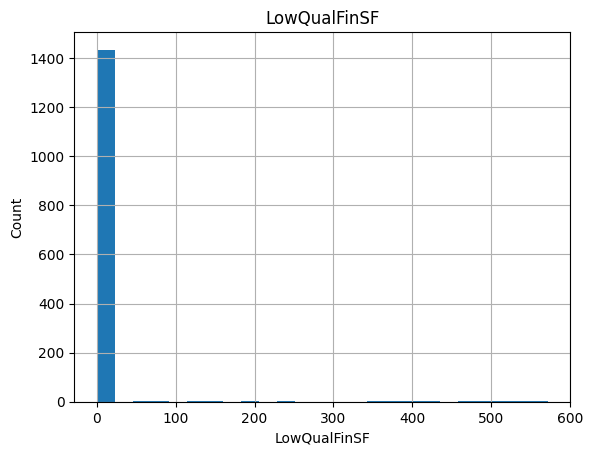

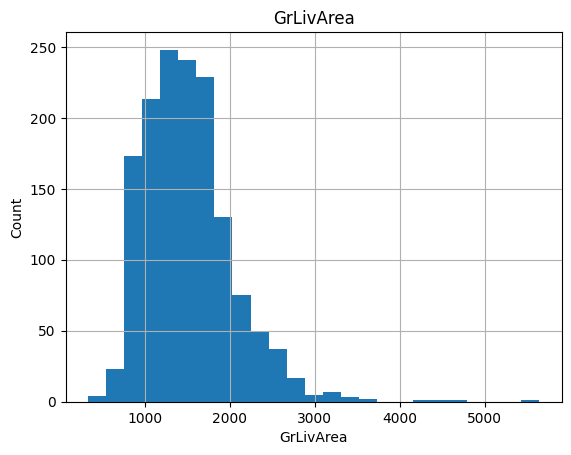

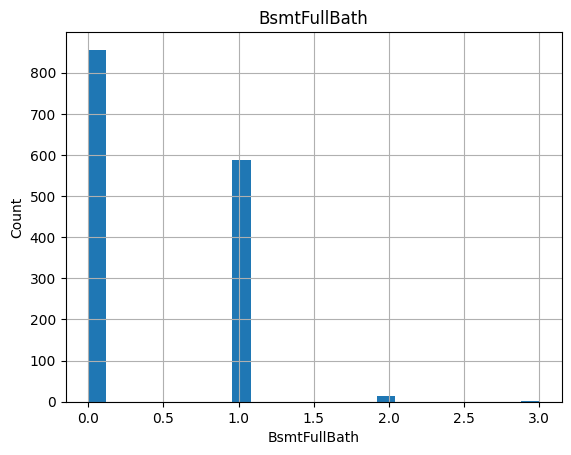

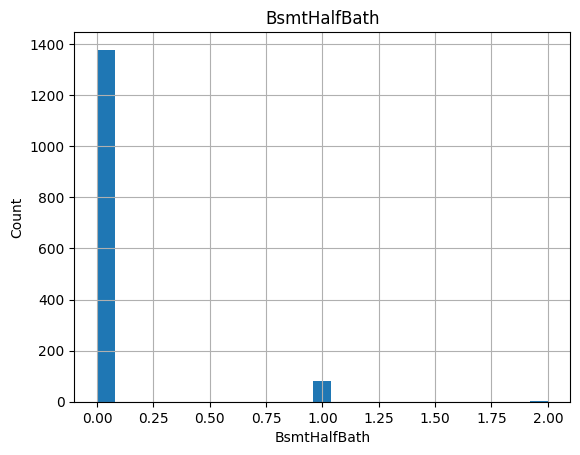

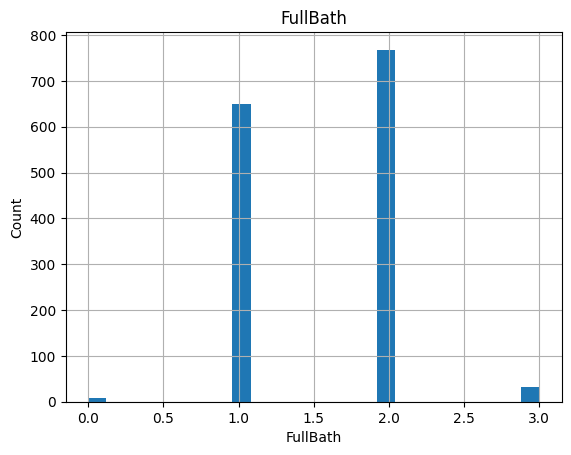

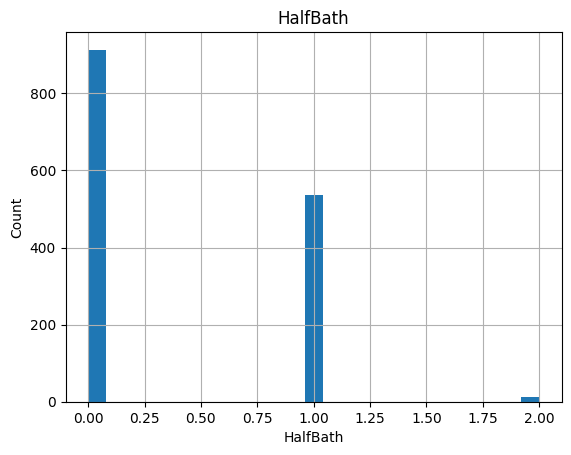

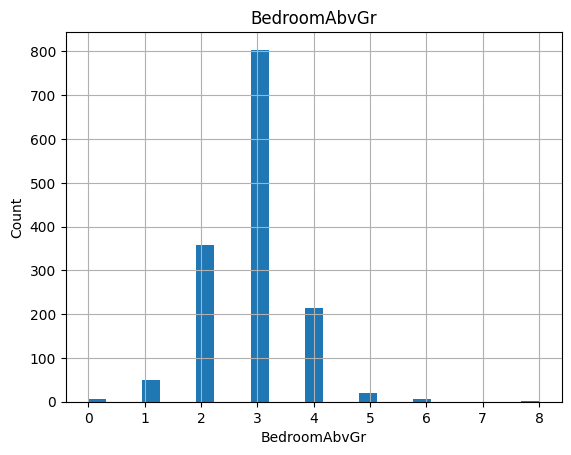

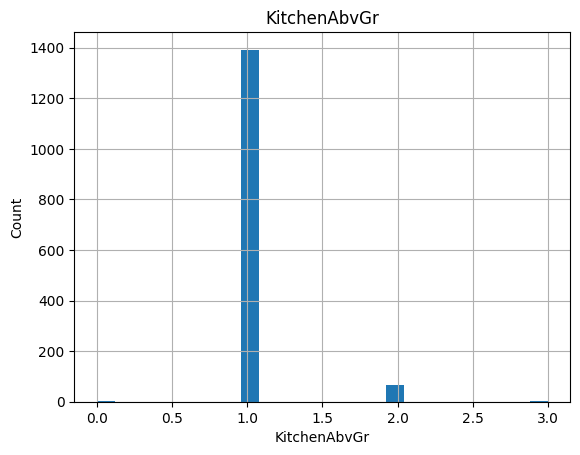

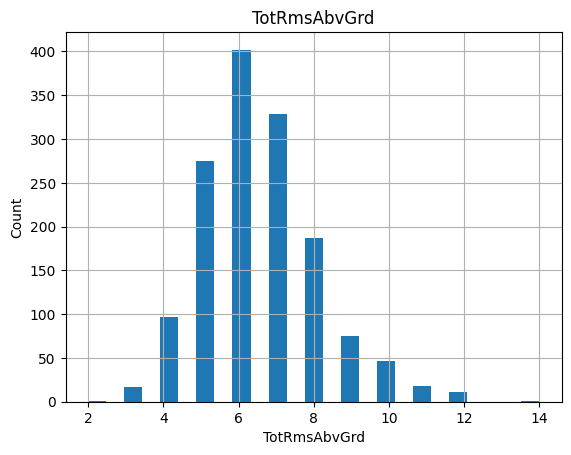

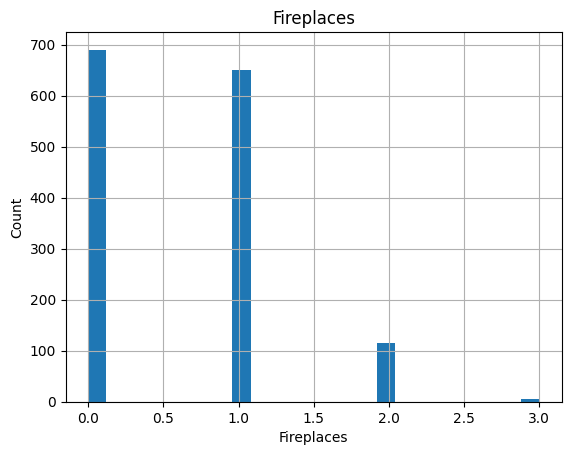

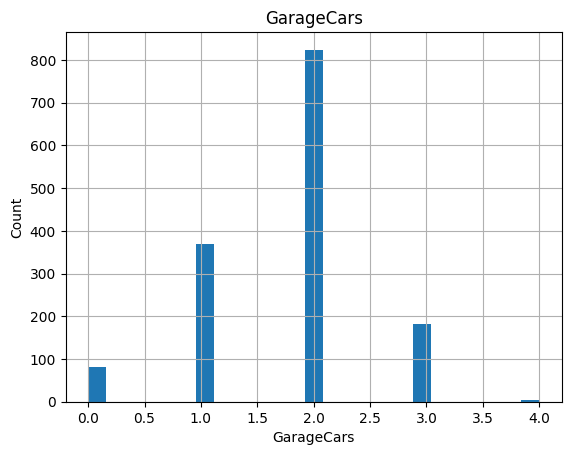

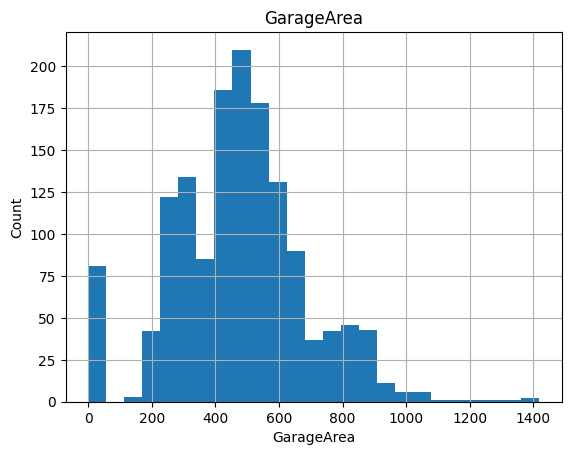

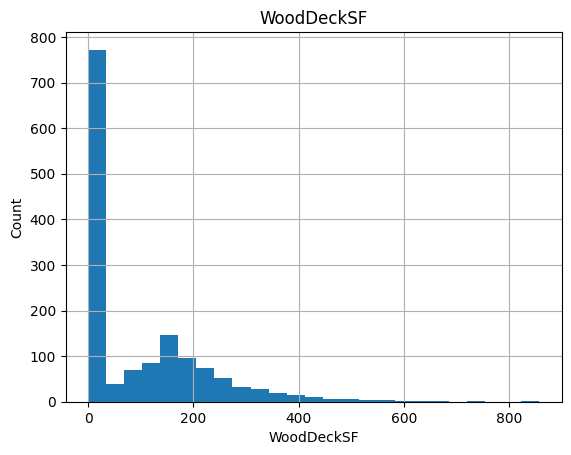

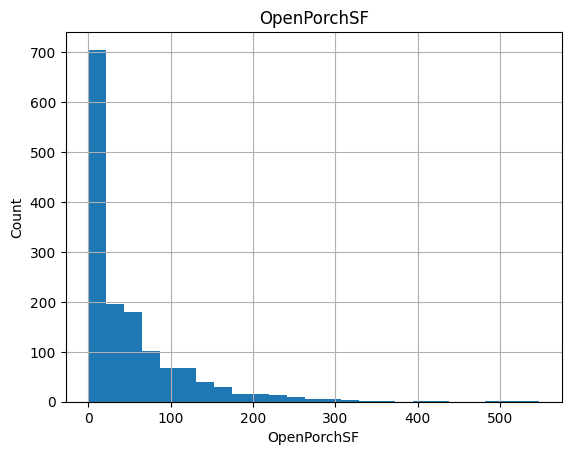

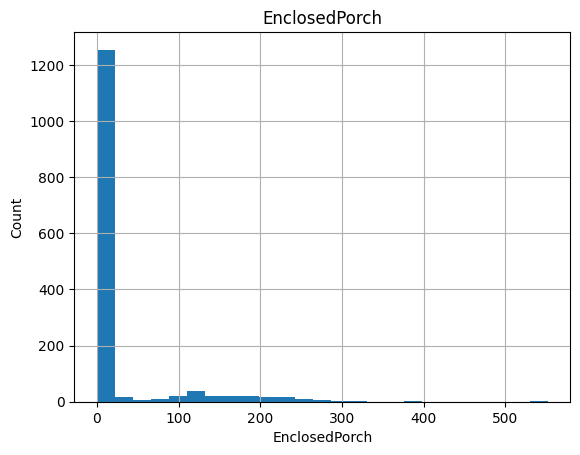

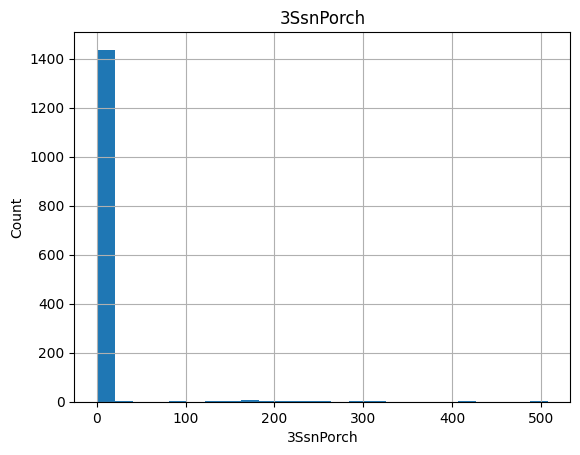

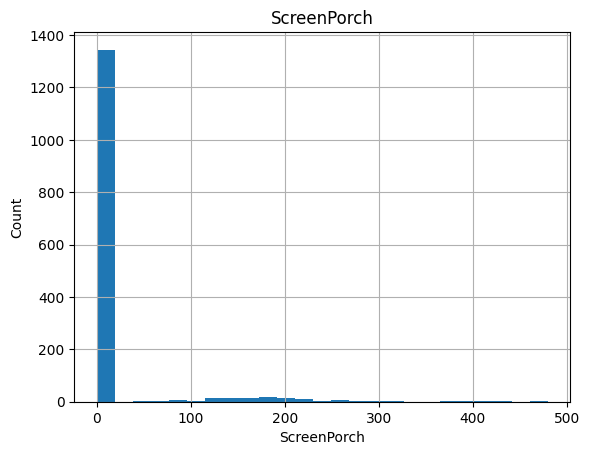

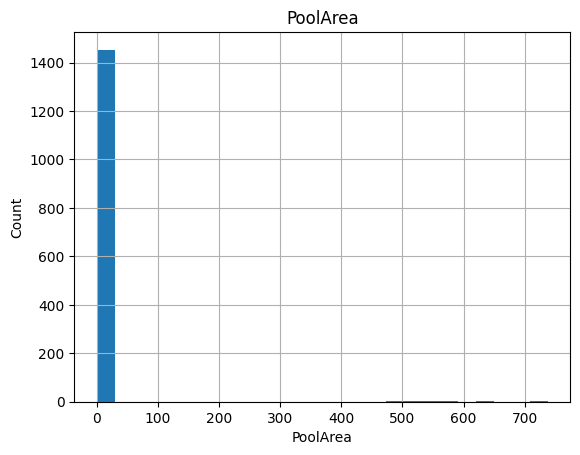

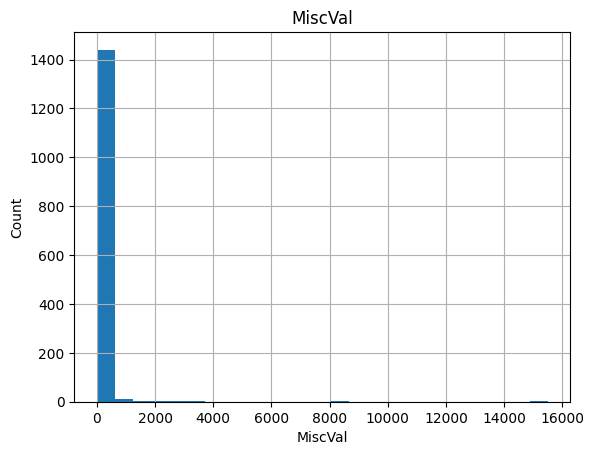

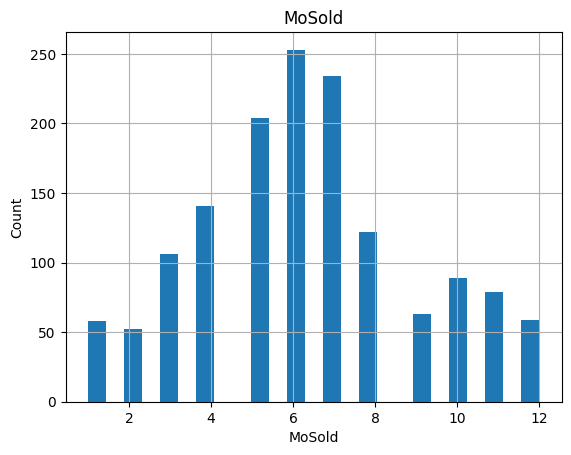

In [113]:
for feature in numerical_features:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

We can see that some features like GarageCars,FirePlaces etc have some specific discretized values.

In [114]:
# Some of the numerical_features seems to have categories, so checking their unique values
unique_cnt = {}
for feature in numerical_features:
    cnt = df_train[feature].nunique()
    #print(f'{feature}: {cnt}')
    unique_cnt[feature]=cnt

sorted_cnt = sorted(unique_cnt.items(),key=lambda x: x[1],reverse=True)
sorted_cnt

[('LotArea', 1073),
 ('GrLivArea', 861),
 ('BsmtUnfSF', 780),
 ('1stFlrSF', 753),
 ('TotalBsmtSF', 721),
 ('BsmtFinSF1', 637),
 ('GarageArea', 441),
 ('2ndFlrSF', 417),
 ('MasVnrArea', 327),
 ('WoodDeckSF', 274),
 ('OpenPorchSF', 202),
 ('BsmtFinSF2', 144),
 ('EnclosedPorch', 120),
 ('LotFrontage', 110),
 ('ScreenPorch', 76),
 ('LowQualFinSF', 24),
 ('MiscVal', 21),
 ('3SsnPorch', 20),
 ('MSSubClass', 15),
 ('TotRmsAbvGrd', 12),
 ('MoSold', 12),
 ('OverallQual', 10),
 ('OverallCond', 9),
 ('BedroomAbvGr', 8),
 ('PoolArea', 8),
 ('GarageCars', 5),
 ('BsmtFullBath', 4),
 ('FullBath', 4),
 ('KitchenAbvGr', 4),
 ('Fireplaces', 4),
 ('BsmtHalfBath', 3),
 ('HalfBath', 3)]

Eventhough some features like HalfBath,Fireplaces etc have numerical values, they have some certain set of discrete values. So these features are considered discrete_numeric_values.

In [115]:
discrete_numerical_features=[]
continuous_numerical_features=[]
[discrete_numerical_features.append(feature[0]) if feature[1]<25 else continuous_numerical_features.append(feature[0]) for feature in sorted_cnt]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [117]:
print(len(discrete_numerical_features))
discrete_numerical_features

17


['LowQualFinSF',
 'MiscVal',
 '3SsnPorch',
 'MSSubClass',
 'TotRmsAbvGrd',
 'MoSold',
 'OverallQual',
 'OverallCond',
 'BedroomAbvGr',
 'PoolArea',
 'GarageCars',
 'BsmtFullBath',
 'FullBath',
 'KitchenAbvGr',
 'Fireplaces',
 'BsmtHalfBath',
 'HalfBath']

In [116]:
print(len(continuous_numerical_features))
continuous_numerical_features

15


['LotArea',
 'GrLivArea',
 'BsmtUnfSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GarageArea',
 '2ndFlrSF',
 'MasVnrArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'BsmtFinSF2',
 'EnclosedPorch',
 'LotFrontage',
 'ScreenPorch']

we can observe that the continuos numerical variables are not following normal distribution,
so we try to apply some transformations to follow a near normal distribution

In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We have a lot of NaN valued features. They must be analysed and appropirate action has to be taken

In [119]:
nan_features = {feature:df_train[feature].isnull().sum() for feature in df_train.columns if df_train[feature].isnull().sum()>1}
sorted_nan_features = sorted(nan_features.items(),key=lambda x: x[1],reverse=True)
sorted_nan_features

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('MasVnrType', 872),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrArea', 8)]

Since we have more than 90% of the data as missing values for the features-'PoolQC','MiscFeature','Alley' we can drop them

In [120]:
df_train.drop(['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)
df_train.shape

(1460, 77)

In [121]:
nan_features_categorical =[feature for feature in nan_features if feature not in ['PoolQC','MiscFeature','Alley'] and df_train[feature].dtypes=='O']
print(f'Total categorical Nan features: {len(nan_features_categorical)}')
nan_features_categorical

Total categorical Nan features: 12


['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

In [122]:
nan_features_numerical = [features for features in nan_features if features not in ['PoolQC','MiscFeature','Alley'] and features not in nan_features_categorical]
nan_features_numerical

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [123]:
df_train[nan_features_numerical].dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

### Now seeing how the independent and dependent features are correlated

<Axes: >

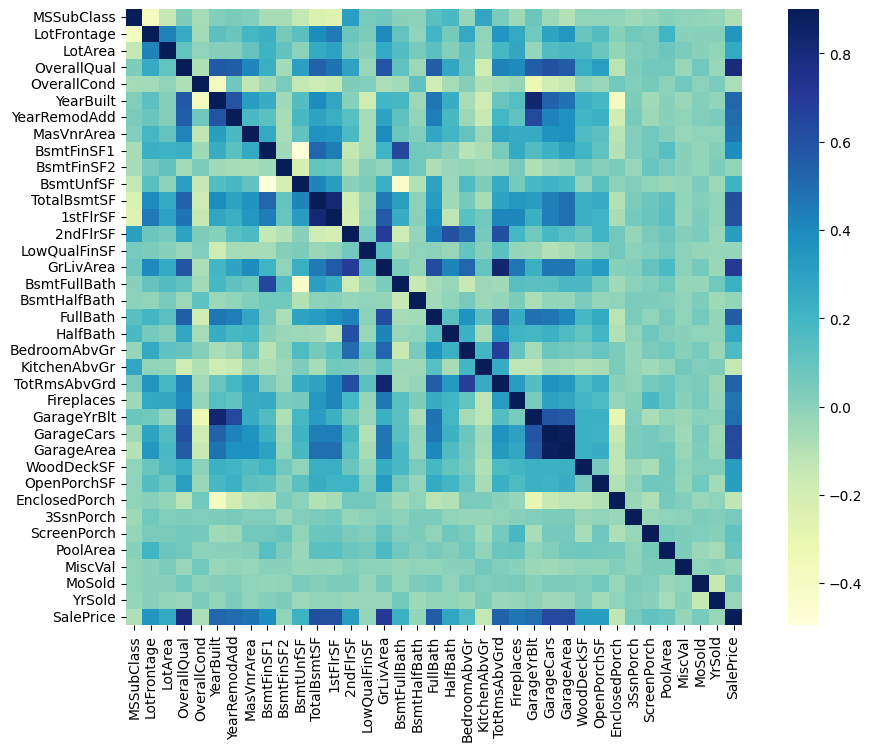

In [124]:
correl_mat = df_train.corr(numeric_only=True)
plt.subplots(figsize=(12,8))
sns.heatmap(correl_mat,vmax=0.9,square=True,cmap="YlGnBu")

In [125]:
correl_mat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


We can observe from correlation matrix that,
1. GarageCars,GarageArea are highly correlated with each other
2. Therefore we can remove any one of these highly correlated variables


In [80]:
pd_ser = correl_mat['GarageArea'].sort_values()
pd_ser

OverallCond     -0.151521
EnclosedPorch   -0.121777
MSSubClass      -0.098672
LowQualFinSF    -0.067601
KitchenAbvGr    -0.064433
MiscVal         -0.027400
YrSold          -0.027378
BsmtHalfBath    -0.024536
BsmtFinSF2      -0.018227
MoSold           0.027974
3SsnPorch        0.035087
ScreenPorch      0.051412
PoolArea         0.061047
BedroomAbvGr     0.065253
2ndFlrSF         0.138347
HalfBath         0.163549
BsmtFullBath     0.179189
LotArea          0.180403
BsmtUnfSF        0.183303
WoodDeckSF       0.224666
OpenPorchSF      0.241435
Fireplaces       0.269141
BsmtFinSF1       0.296970
TotRmsAbvGrd     0.337822
LotFrontage      0.344997
YearRemodAdd     0.371600
MasVnrArea       0.373066
FullBath         0.405656
GrLivArea        0.468997
YearBuilt        0.478954
TotalBsmtSF      0.486665
1stFlrSF         0.489782
OverallQual      0.562022
GarageYrBlt      0.564567
SalePrice        0.623431
GarageCars       0.882475
GarageArea       1.000000
Name: GarageArea, dtype: float64

In [81]:
correl_mat['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

We can find that OverallQual is positively correlated with SalePrice

In [126]:
df_train.drop('GarageCars',axis=1,inplace=True)
df_train.shape

(1460, 76)

### Filling Missing values

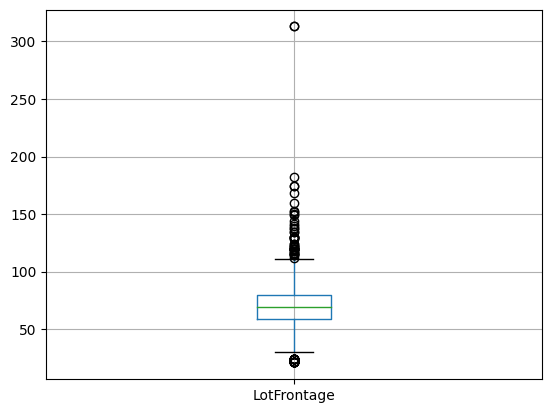

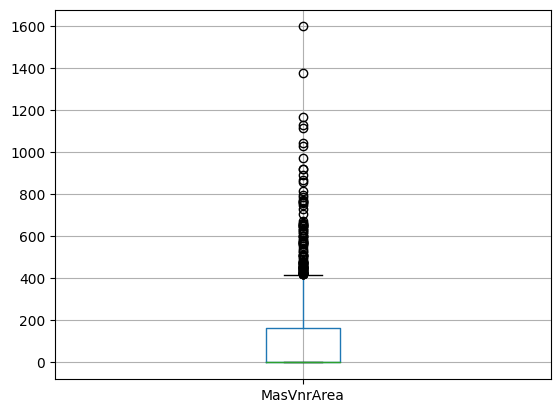

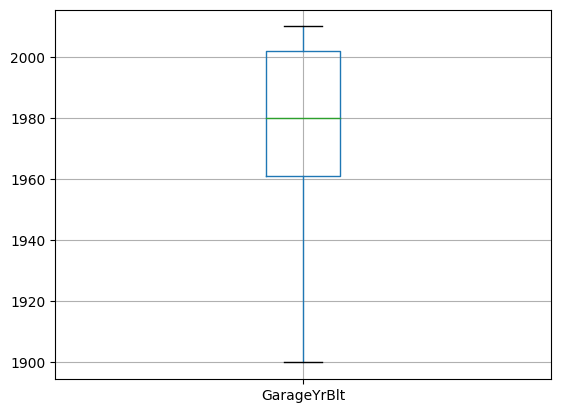

In [127]:
for feat in nan_features_numerical:
    data = df_train.copy()
    data.boxplot(column=feat)
    plt.show()

In [138]:
# Since we have outliers, we can fill in with the median value for LotFrontage and MasVnrArea
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(),inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(),inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(),inplace=True)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype('int64')

In [139]:
df_train[nan_features_numerical].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [140]:
na_vals = [ 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']  # Categorical variables with NaN values.

for feature in na_vals:
    df_train.fillna('NA',inplace=True)

In [141]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Now looking at the numerical feature's data distribution

In [142]:
year_features = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [143]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold'],
      dtype='object')

Lets look at the dependent feature-SalePrice's data distribution


 Mu = 180921.20 and Sigma = 79415.29



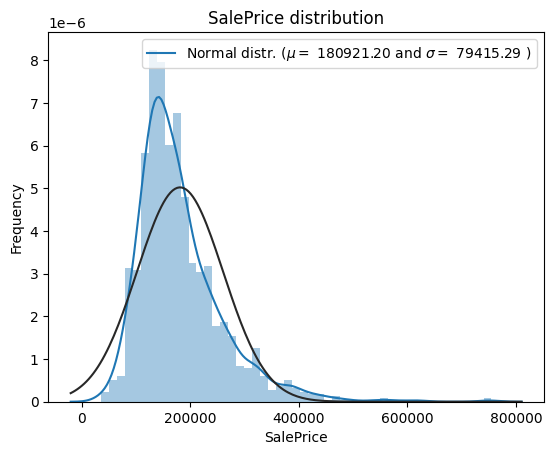

<Figure size 640x480 with 0 Axes>

In [144]:
from scipy import stats
from scipy.stats import norm, skew 

sns.distplot(df_train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
print('\n Mu = {:.2f} and Sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal distr. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
plt.show()

we can see that the target variable is right-skewed, we need to apply some transformations to properly align the data distribution


 mu = 12.02 and sigma = 0.40



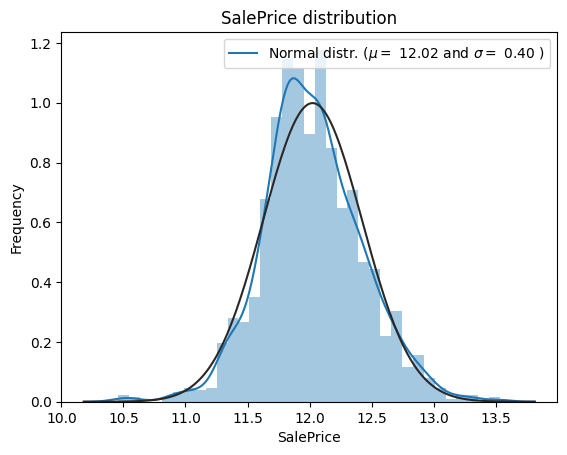

<Figure size 640x480 with 0 Axes>

In [145]:
#log1p applies the log(1+x) transformation
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal distr. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
plt.show()

Now, the target feature is normally distributed

In [146]:
df_train[continuous_numerical_features].dtypes

LotArea            int64
GrLivArea          int64
BsmtUnfSF          int64
1stFlrSF           int64
TotalBsmtSF        int64
BsmtFinSF1         int64
GarageArea         int64
2ndFlrSF           int64
MasVnrArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
BsmtFinSF2         int64
EnclosedPorch      int64
LotFrontage      float64
ScreenPorch        int64
dtype: object

In [147]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].astype('int64')
df_train['LotFrontage'] = df_train['LotFrontage'].astype('int64')

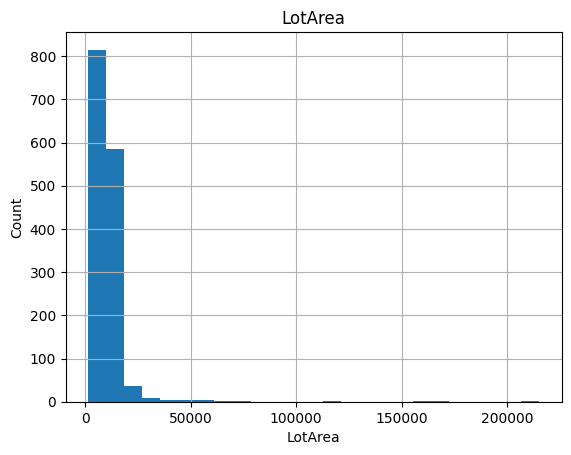

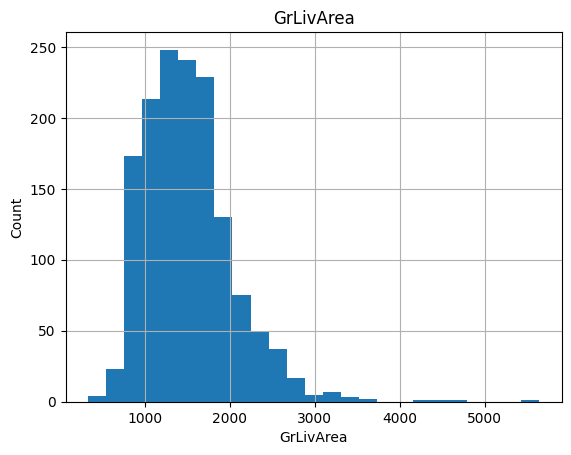

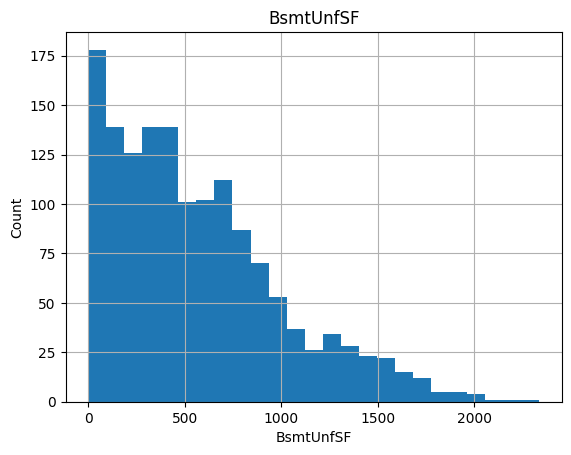

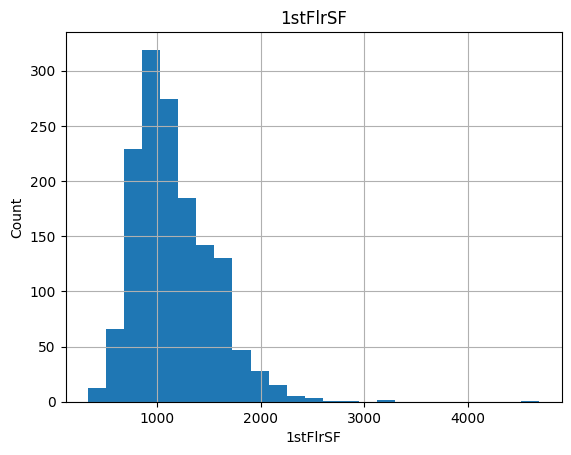

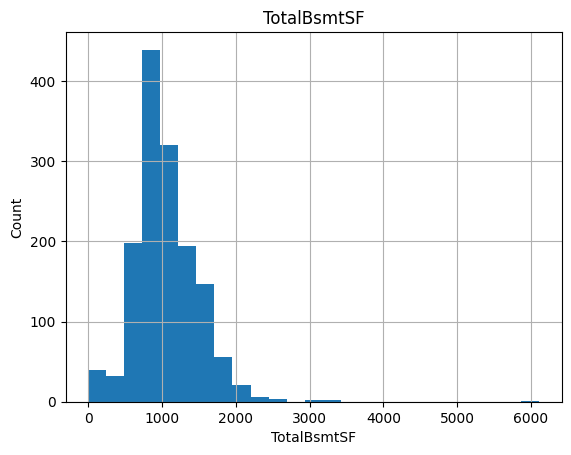

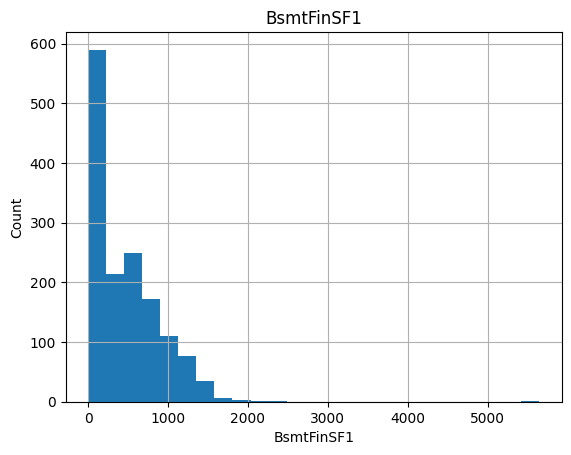

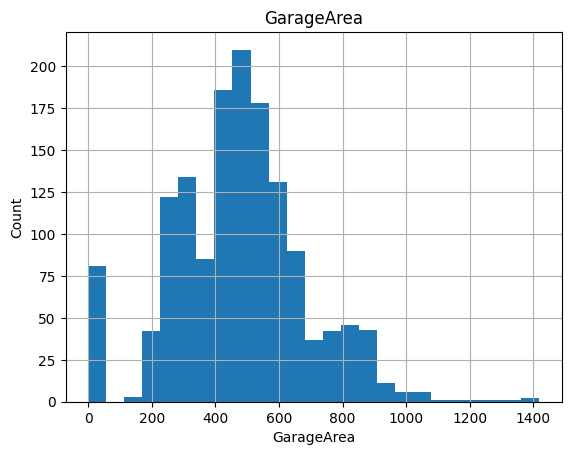

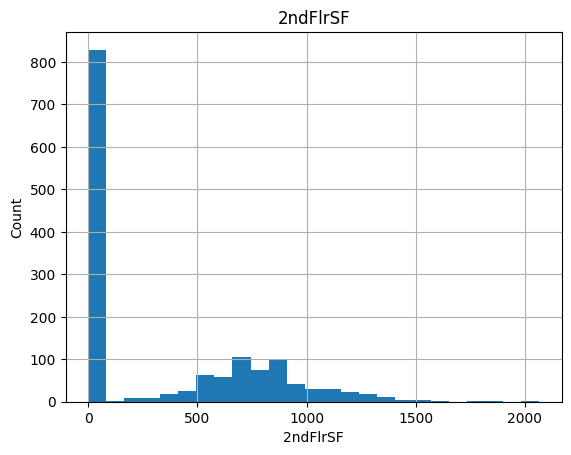

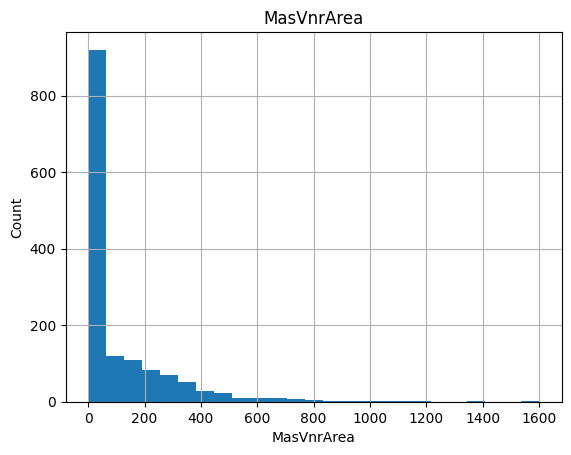

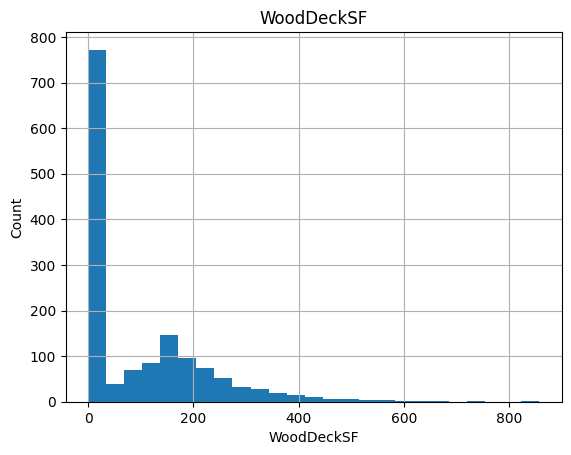

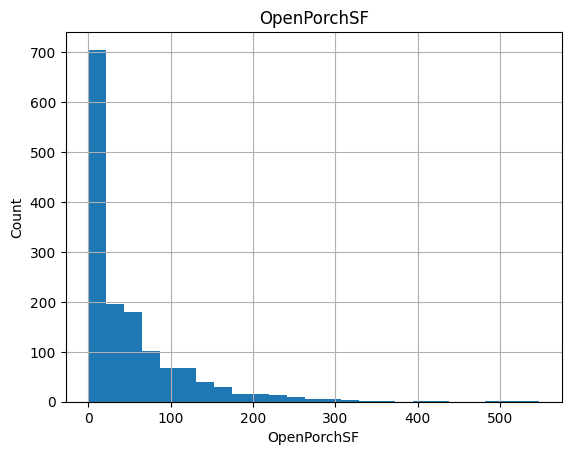

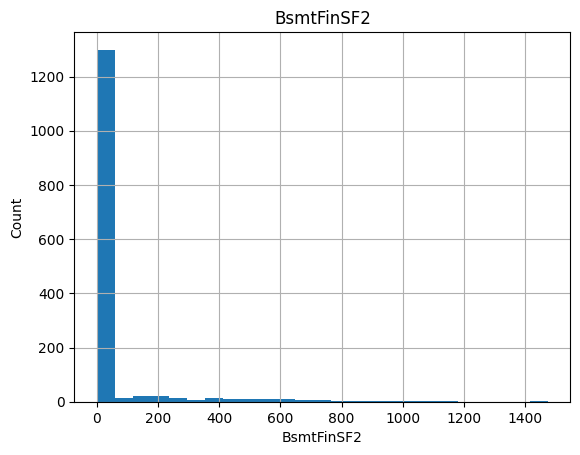

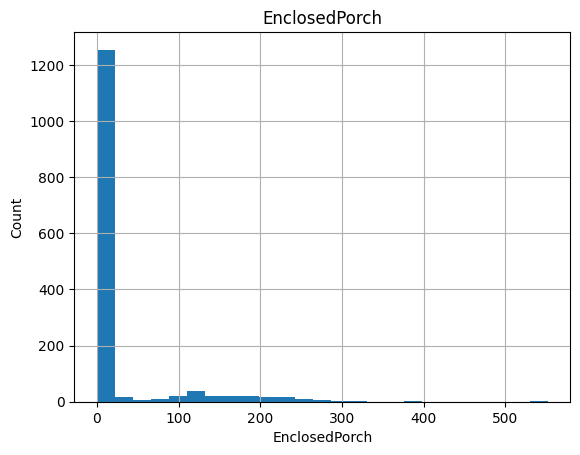

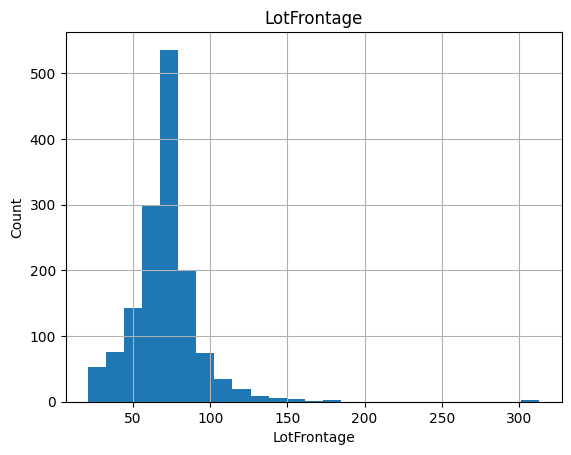

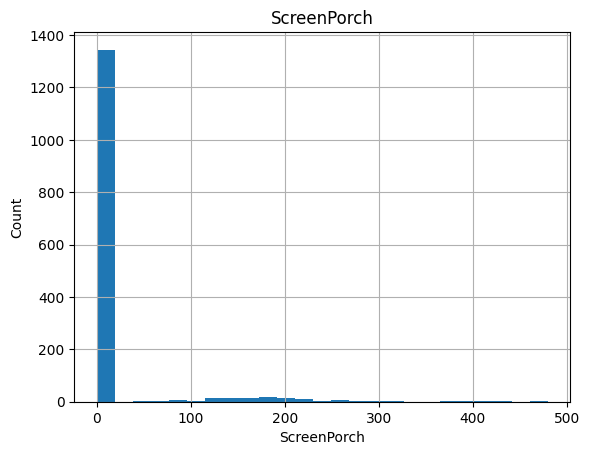

In [148]:
for feature in continuous_numerical_features:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

It is observed that the numerical continuous variables are having skewed distributions and hence they require log transformation

In [149]:
continuous_numerical_features

['LotArea',
 'GrLivArea',
 'BsmtUnfSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GarageArea',
 '2ndFlrSF',
 'MasVnrArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'BsmtFinSF2',
 'EnclosedPorch',
 'LotFrontage',
 'ScreenPorch']

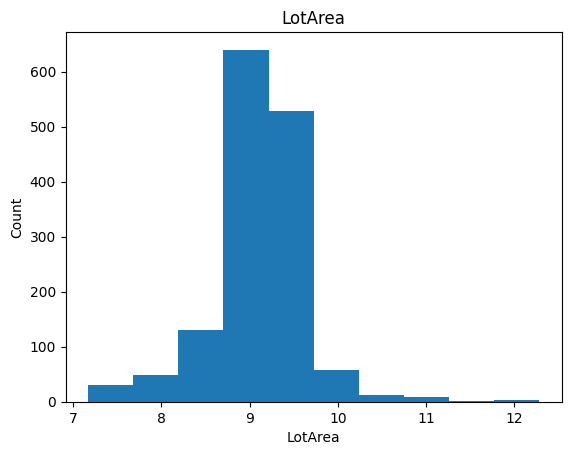

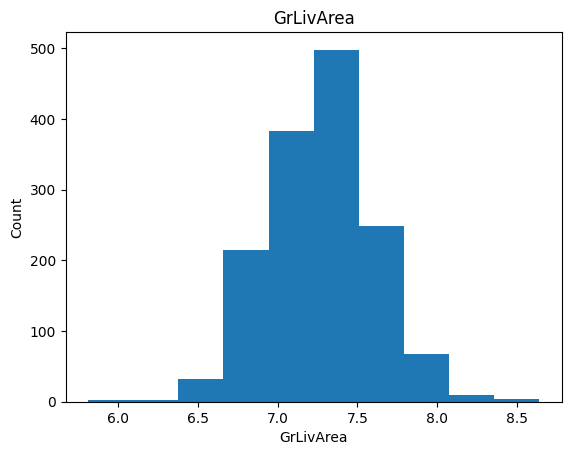

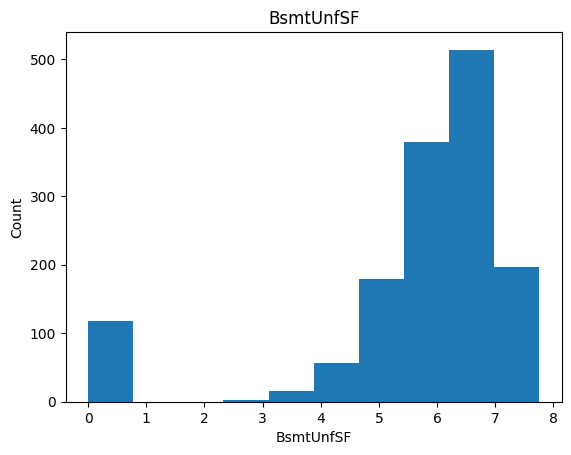

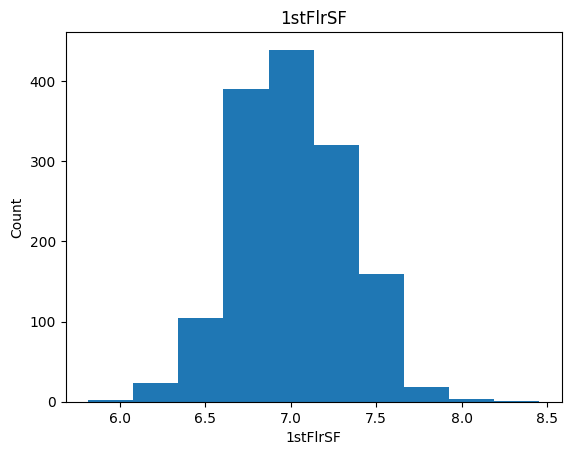

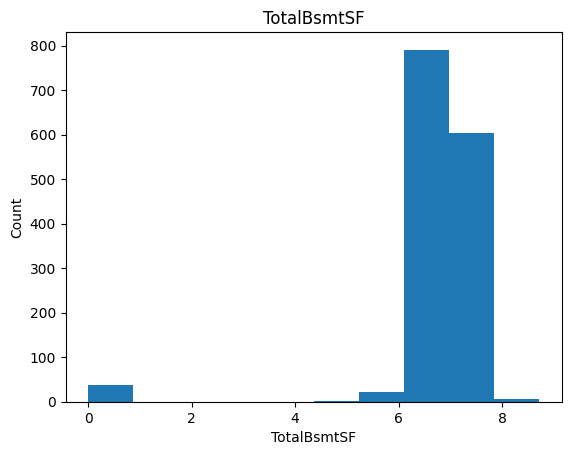

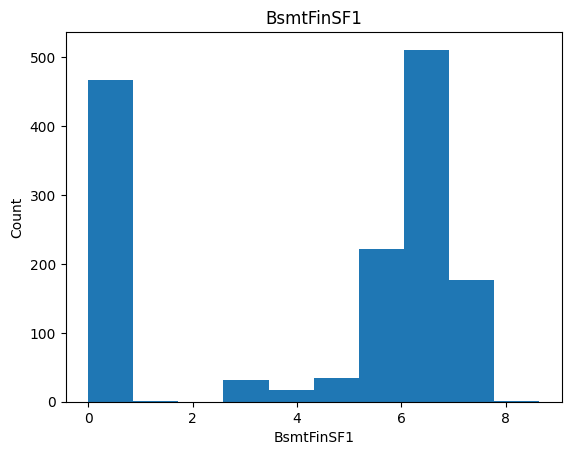

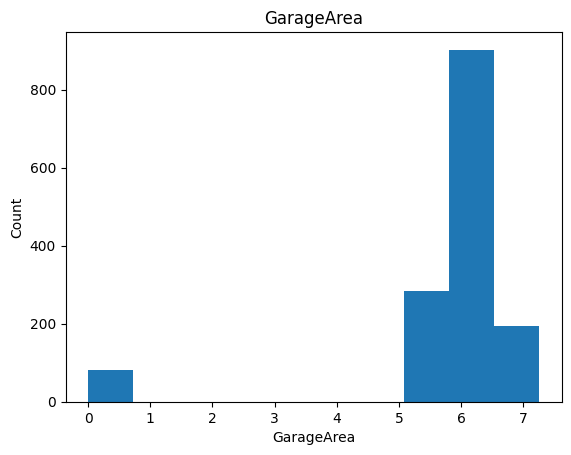

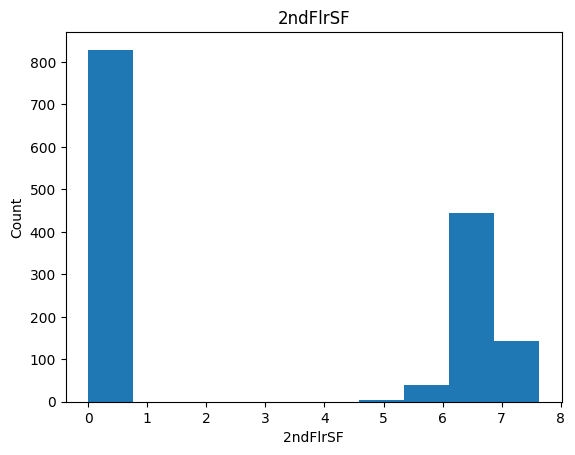

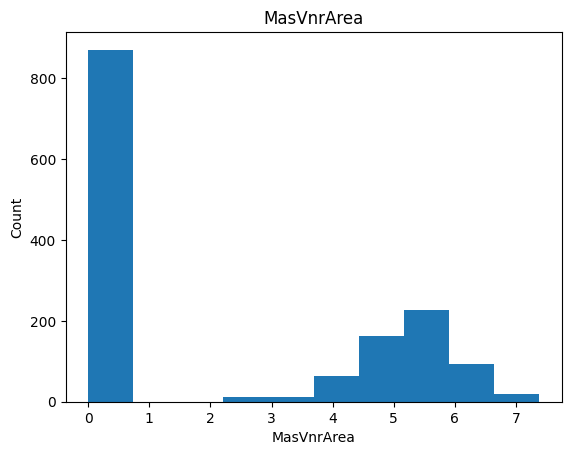

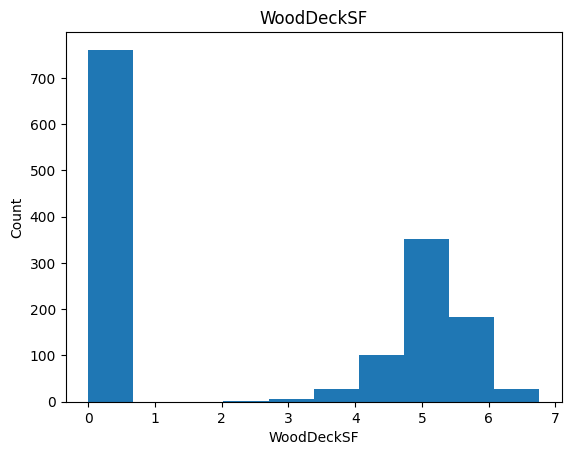

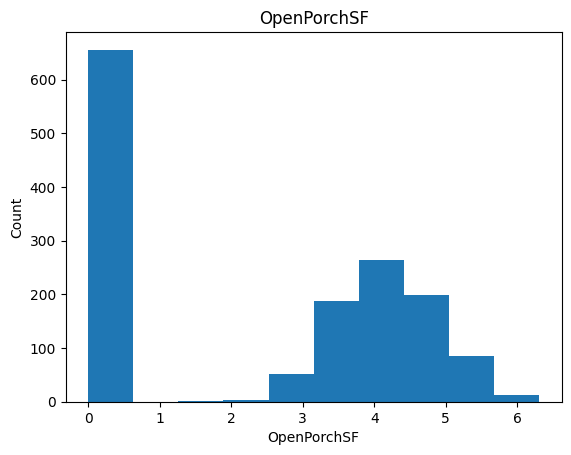

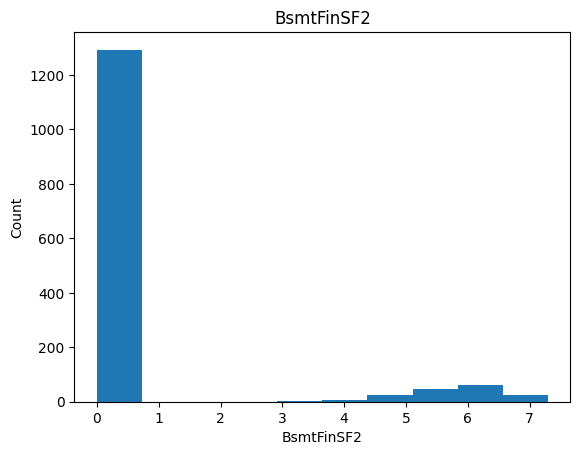

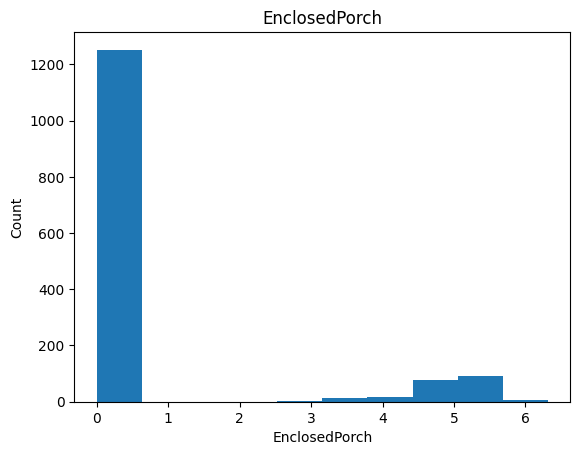

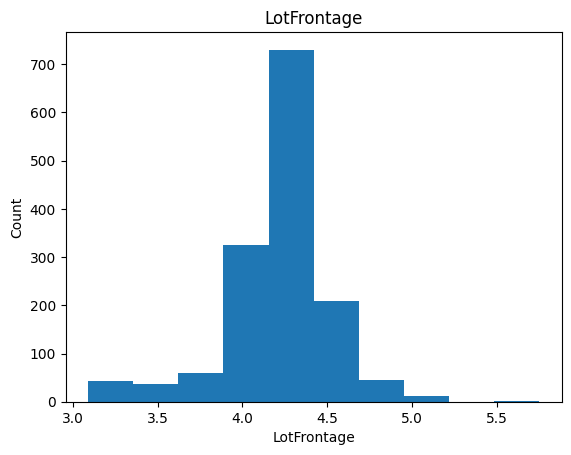

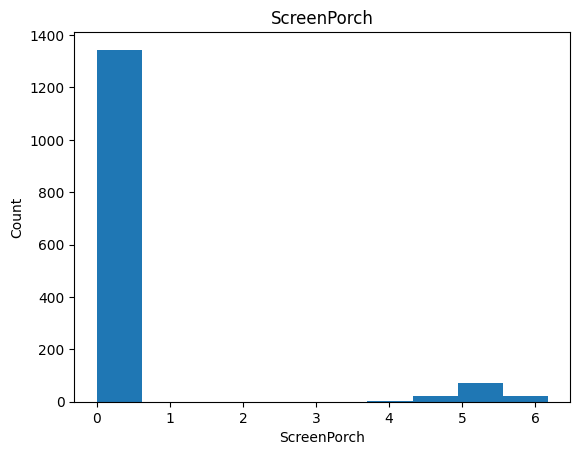

In [150]:
for feature in continuous_numerical_features:
    #data=df_train.copy()
    df_train[feature]=np.log1p(df_train[feature])
    plt.hist(df_train[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Now, we are able to see distributions with a nearly normal distribution (with single mode) or two modes

In [ ]:
df_train

In [152]:
categorical_features = ['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

We handled NaN values for numerical variables

In [198]:
## Temporal Variables (Date Time Variables)
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df_train[feature]=df_train['YrSold']-df_train[feature]

In [199]:
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.000000,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,6.308098,TA,TA,Y,0.000000,4.127134,0.000000,0,0.0,0,NA,0,2,2008,WD,Normal,12.247699
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.000000,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,6.133398,TA,TA,Y,5.700444,0.000000,0.000000,0,0.0,0,NA,0,5,2007,WD,Normal,12.109016
2,60,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.000000,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,6.411818,TA,TA,Y,0.000000,3.761200,0.000000,0,0.0,0,NA,0,9,2008,WD,Normal,12.317171
3,70,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.000000,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,6.466145,TA,TA,Y,0.000000,3.583519,5.609472,0,0.0,0,NA,0,2,2006,WD,Abnorml,11.849405
4,60,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.000000,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,6.729824,TA,TA,Y,5.262690,4.442651,0.000000,0,0.0,0,NA,0,12,2008,WD,Normal,12.429220
5,50,RL,4.454347,9.555064,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,6.597146,Unf,0.000000,4.174387,6.680855,GasA,Ex,Y,SBrkr,6.680855,6.340359,0,7.217443,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,6.175867,TA,TA,Y,3.713572,3.433987,0.000000,320,0.0,0,MnPrv,700,10,2009,WD,Normal,11.870607
6,20,RL,4.330733,9.218804,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,5.231109,Gd,TA,PConc,Ex,TA,Av,GLQ,7.222566,Unf,0.000000,5.762051,7.430707,GasA,Ex,Y,SBrkr,7.435438,0.000000,0,7.435438,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,6.456770,TA,TA,Y,5.545177,4.060443,0.000000,0,0.0,0,NA,0,8,2007,WD,Normal,12.634606
7,60,RL,4.248495,9.247925,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,5.484797,TA,TA,CBlock,Gd,TA,Mn,ALQ,6.756932,BLQ,3.496508,5.379897,7.010312,GasA,Ex,Y,SBrkr,7.010312,6.891626,0,7.645398,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,6.184149,TA,TA,Y,5.463832,5.323010,5.433722,0,0.0,0,NA,350,11,2009,WD,Normal,12.206078
8,50,RM,3.951244,8.719481,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkF

In [200]:
df_train.to_csv('df_train_without_cat_enc.csv',index=False)

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [157]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [201]:
df_train1 = df_train.copy()
df_train1[continuous_numerical_features]

,LotArea,GrLivArea,BsmtUnfSF,1stFlrSF,TotalBsmtSF,BsmtFinSF1,GarageArea,2ndFlrSF,MasVnrArea,WoodDeckSF,OpenPorchSF,BsmtFinSF2,EnclosedPorch,LotFrontage,ScreenPorch
0,9.042040,7.444833,5.017280,6.753438,6.753438,6.561031,6.308098,6.751101,5.283204,0.000000,4.127134,0.000000,0.000000,4.189655,0.0
1,9.169623,7.141245,5.652489,7.141245,7.141245,6.886532,6.133398,0.000000,0.000000,5.700444,0.000000,0.000000,0.000000,4.394449,0.0
2,9.328212,7.488294,6.075346,6.825460,6.825460,6.188264,6.411818,6.765039,5.093750,0.000000,3.761200,0.000000,0.000000,4.234107,0.0
3,9.164401,7.448916,6.293419,6.869014,6.629363,5.379897,6.466145,6.629363,0.000000,0.000000,3.583519,0.000000,5.609472,4.110874,0.0
4,9.565284,7.695758,6.196444,7.044033,7.044033,6.486161,6.729824,6.960348,5.860786,5.262690,4.442651,0.000000,0.000000,4.442651,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8.976894,7.407318,6.860664,6.860664,6.860664,0.000000,6.133398,6.543912,0.000000,0.000000,3.713572,0.000000,0.000000,4.143135,0.0
1456,9.486152,7.637234,6.380123,7.637234,7.341484,6.673298,6.216606,0.000000,4.787492,5.857933,0.000000,5.099866,0.000000,4.454347,0.0
1457,9.109746,7.758333,6.777647,7.080868,7.050123,5.620401,5.533389,7.050123,0.000000,0.000000,4.110874,0.000000,0.000000,4.204693,0.0
1458,9.181735,6.983790,0.000000,6.983790,6.983790,3.912023,5.484797,0.000000,0.000000,5.905362,0.000000,6.937314,4.727388,4.234107,0.0


In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df_train1[df_train1.columns[:-1]],df_train1['SalePrice'],test_size=0.15,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1241, 75) (219, 75) (1241,) (219,)


In [203]:
X_train[continuous_numerical_features] = scaler.fit_transform(X_train[continuous_numerical_features])
X_train[continuous_numerical_features]

,LotArea,GrLivArea,BsmtUnfSF,1stFlrSF,TotalBsmtSF,BsmtFinSF1,GarageArea,2ndFlrSF,MasVnrArea,WoodDeckSF,OpenPorchSF,BsmtFinSF2,EnclosedPorch,LotFrontage,ScreenPorch
984,0.126417,0.368909,-4.740586,0.389512,-14.165476,-0.903932,0.217549,0.920971,0.000000,0.000000,-0.768178,0.000000,0.0,0.303291,0.0
777,0.766639,-1.110479,-1.175730,-0.434373,-0.283282,0.102983,-0.163248,0.000000,0.000000,1.069989,-0.768178,0.000000,0.0,1.352099,0.0
707,-0.994244,-0.233617,-0.021344,0.426238,0.592089,0.121843,0.255466,0.000000,1.011363,1.025886,0.085708,0.000000,0.0,-1.315402,0.0
598,0.702274,0.253933,-4.740586,0.904753,0.750071,0.181943,0.483363,0.000000,1.197975,0.000000,-0.768178,4.997212,0.0,0.538272,0.0
874,-1.195691,-0.585454,0.272557,-1.046698,-0.786325,-0.903932,-1.640642,0.928822,0.000000,0.642476,-0.768178,0.000000,0.0,-1.026002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.066143,-0.250549,0.769052,0.409621,0.576538,-0.415607,-0.163248,0.000000,0.000000,0.000000,-0.037372,0.000000,0.0,0.446068,0.0
1130,-0.476425,0.666376,0.040990,0.432850,0.252546,0.072231,0.342160,0.983530,0.000000,1.182952,0.119061,0.000000,0.0,-0.217001,0.0
1294,-0.369743,-1.186677,0.296054,-0.509159,-0.283282,-0.126593,0.329080,0.000000,0.000000,0.000000,-0.768178,0.000000,0.0,-0.507542,0.0
860,-0.524993,-0.067871,0.502586,-0.390696,-0.172420,-0.903932,-1.496628,0.947281,0.000000,0.000000,0.510192,0.000000,0.0,-0.822944,0.0


In [204]:
X_test[continuous_numerical_features] = scaler.transform(X_test[continuous_numerical_features])
X_test[continuous_numerical_features]

,LotArea,GrLivArea,BsmtUnfSF,1stFlrSF,TotalBsmtSF,BsmtFinSF1,GarageArea,2ndFlrSF,MasVnrArea,WoodDeckSF,OpenPorchSF,BsmtFinSF2,EnclosedPorch,LotFrontage,ScreenPorch
892,-0.302175,-0.713432,-0.137971,-0.044684,0.134031,0.081900,-1.120892,0.000000,0.000000,1.025886,-0.768178,0.000000,0.000000,0.052312,0.0
1105,0.568671,1.292630,-0.072985,0.699811,0.796871,0.148945,0.740096,1.065550,1.151702,1.019729,0.046771,0.000000,0.000000,1.278337,0.0
413,-0.156604,-0.798663,0.579487,-0.128336,0.032812,-0.903932,-0.539614,0.000000,0.000000,0.000000,-0.768178,0.000000,4.875197,-0.757669,0.0
522,-1.507150,0.276869,0.187341,-0.180103,0.024658,0.005012,-0.250515,0.985145,0.000000,0.000000,-0.017938,0.000000,3.610918,-1.167864,0.0
1036,0.686887,0.217014,0.178405,0.868518,1.005987,0.147469,1.204998,0.000000,0.832881,1.059226,-0.768178,0.000000,0.000000,0.926837,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,3.255095,-0.168784,-1.221893,0.489870,0.684482,-0.080932,-0.167517,0.000000,0.000000,0.859027,-0.768178,6.969791,0.000000,0.204939,0.0
240,-0.146290,0.141293,0.022342,0.794201,0.936439,0.155555,0.837727,0.000000,0.705534,0.970143,0.427474,0.000000,0.000000,0.303291,0.0
597,-2.069328,-0.105778,0.749747,0.551708,0.487205,-0.903932,0.563260,0.000000,0.838309,0.934870,-0.107826,0.000000,0.000000,-0.957066,0.0
946,-0.372294,-0.559934,-1.175730,0.105968,0.292372,0.100174,0.949506,0.000000,0.949554,0.870565,-0.768178,5.686975,0.000000,0.052312,0.0


# Perform XGBoost Regressor training

In [205]:
import xgboost as xgb

In [206]:
# This is must for conversion of categorical features in XGBoost
X_train[categorical_features] = X_train[categorical_features].astype('category')
X_train[categorical_features].dtypes

MSZoning         category
Street           category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
Heating          category
HeatingQC        category
CentralAir       category
Electrical       category
KitchenQual      category
Functional       category
FireplaceQu      category
GarageType       category
GarageFinish     category
GarageQual       category
GarageCond       category
PavedDrive       category
Fence            category
SaleType    

## 1. Using XGBoost Regression

### Hyper parameter tuning for XGBoost

In [207]:
from sklearn.metrics import r2_score
model_regressor = xgb.XGBRegressor(eval_metric=r2_score,enable_categorical=True)
params = {
    'booster':['gbtree','gblinear'],
    'learning_rate':[0.05,0.1,0.15,0.2],
    'n_estimators':[100,200,500,600],
    'max_depth':[4,5,6,7]
}

In [208]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(estimator=model_regressor,param_distributions=params,cv=10,verbose=3)
clf

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=<function r2_score at 0x7bbb5aaf0430>,
                                          feature_types=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_c...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [4, 5, 6, 7],
                                        'n_estimators': [100, 200, 500, 600]},
                   verbose=3)

In [209]:
clf.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=600;, score=0.888 total time=   1.9s
[CV 2/10] END booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=600;, score=0.863 total time=   1.9s
[CV 3/10] END booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=600;, score=0.884 total time=   1.9s
[CV 4/10] END booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=600;, score=0.878 total time=   2.9s
[CV 5/10] END booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=600;, score=0.815 total time=   1.8s
[CV 6/10] END booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=600;, score=0.879 total time=   1.8s
[CV 7/10] END booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=600;, score=0.898 total time=   2.0s
[CV 8/10] END booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=600;, score=0.866 total time=   2.9s
[CV 9/10] END booster=gbtree, learning_ra

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=<function r2_score at 0x7bbb5aaf0430>,
                                          feature_types=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_c...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [4, 5, 6, 7],
                                        'n_estimators': [100, 200, 500, 600]},
                   verbose=3)

In [210]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.162177,0.407892,0.033931,0.008218,600,7,0.1,gbtree,"{'n_estimators': 600, 'max_depth': 7, 'learnin...",0.887651,0.862675,0.884395,0.877803,0.815351,0.879281,0.898261,0.866261,0.837197,0.920357,0.872923,0.028364,3
1,1.183907,0.066379,0.032127,0.001876,200,7,0.1,gbtree,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.887752,0.862639,0.884557,0.877710,0.815501,0.879274,0.897970,0.866187,0.836682,0.920442,0.872871,0.028400,4
2,0.475187,0.055526,0.029915,0.000298,500,4,0.1,gblinear,"{'n_estimators': 500, 'max_depth': 4, 'learnin...",0.839107,0.883478,0.911881,0.800664,0.685828,0.893885,0.884113,0.887553,0.838048,0.921991,0.854655,0.066380,9
3,0.504714,0.295353,0.034130,0.010927,100,5,0.05,gbtree,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",0.879769,0.884086,0.888369,0.898208,0.836570,0.873564,0.894954,0.881357,0.860504,0.932292,0.882967,0.023660,2
4,1.019156,0.438255,0.030767,0.000636,200,7,0.2,gbtree,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.882921,0.872013,0.876336,0.877154,0.817805,0.878996,0.901607,0.857949,0.835027,0.909387,0.870919,0.026416,6
5,0.608420,0.029959,0.030333,0.000743,200,5,0.2,gbtree,"{'n_estimators': 200, 'max_depth': 5, 'learnin...",0.870762,0.894270,0.891694,0.903063,0.841266,0.889927,0.899205,0.886306,0.869915,0.929297,0.887570,0.022190,1
6,1.072653,0.025824,0.030691,0.000459,200,7,0.15,gbtree,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.886930,0.860598,0.883443,0.879662,0.813866,0.853287,0.886476,0.836354,0.843818,0.908130,0.865256,0.027198,8
7,0.207808,0.010843,0.031421,0.003599,200,5,0.1,gblinear,"{'n_estimators': 200, 'max_depth': 5, 'learnin...",0.841419,0.876201,0.900887,0.789055,0.672660,0.888793,0.858956,0.874525,0.838660,0.914548,0.845570,0.066932,10
8,3.269812,0.397064,0.033788,0.001966,600,7,0.05,gbtree,"{'n_estimators': 600, 'max_depth': 7, 'learnin...",0.882653,0.867401,0.880901,0.873787,0.817554,0.879112,0.899511,0.858284,0.845976,0.913233,0.871841,0.025601,5
9,1.439557,0.391363,0.030561,0.000383,500,7,0.15,gbtree,"{'n_estimators': 500, 'max_depth': 7, 'learnin...",0.886930,0.860598,0.883443,0.879662,0.813866,0.853287,0.886487,0.836354,0.843818,0.908130,0.865257,0.027199,7


In [211]:
cv_results[['param_n_estimators','param_max_depth','param_learning_rate','param_booster','mean_test_score']]

,param_n_estimators,param_max_depth,param_learning_rate,param_booster,mean_test_score
0,600,7,0.1,gbtree,0.872923
1,200,7,0.1,gbtree,0.872871
2,500,4,0.1,gblinear,0.854655
3,100,5,0.05,gbtree,0.882967
4,200,7,0.2,gbtree,0.870919
5,200,5,0.2,gbtree,0.887570
6,200,7,0.15,gbtree,0.865256
7,200,5,0.1,gblinear,0.845570
8,600,7,0.05,gbtree,0.871841
9,500,7,0.15,gbtree,0.865257


In [212]:
clf.best_estimator_

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True,
             eval_metric=<function r2_score at 0x7bbb5aaf0430>,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [213]:
clf.best_params_

{'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.2,
 'booster': 'gbtree'}

In [214]:
clf.best_score_

0.887570444434967

### Predicting using XGBoost

In [215]:
testing_data = X_test.copy()
testing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,20,RL,0.052312,-0.302175,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,NA,0.000000,TA,TA,CBlock,TA,TA,No,GLQ,0.081900,Unf,0.000000,-0.137971,0.134031,GasA,TA,Y,SBrkr,-0.044684,0.000000,0,-0.713432,0,1,1,0,3,1,TA,6,Typ,0,NA,Attchd,1963,RFn,-1.120892,TA,TA,Y,1.025886,-0.768178,0.000000,0,0.0,0,MnPrv,0,2,2006,WD,Normal
1105,60,RL,1.278337,0.568671,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,1.151702,Gd,TA,PConc,Ex,TA,Av,GLQ,0.148945,Unf,0.000000,-0.072985,0.796871,GasA,Ex,Y,SBrkr,0.699811,1.065550,0,1.292630,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994,RFn,0.740096,TA,TA,Y,1.019729,0.046771,0.000000,0,0.0,0,NA,0,4,2010,WD,Normal
413,30,RM,-0.757669,-0.156604,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,NA,0.000000,TA,TA,CBlock,TA,TA,No,Unf,-0.903932,Unf,0.000000,0.579487,0.032812,GasA,Gd,Y,FuseA,-0.128336,0.000000,0,-0.798663,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927,Unf,-0.539614,TA,TA,Y,0.000000,-0.768178,4.875197,0,0.0,0,NA,0,3,2010,WD,Normal
522,50,RM,-1.167864,-1.507150,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,NA,0.000000,TA,Gd,CBlock,TA,TA,No,ALQ,0.005012,Unf,0.000000,0.187341,0.024658,GasA,Ex,Y,SBrkr,-0.180103,0.985145,0,0.276869,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950,Unf,-0.250515,TA,TA,Y,0.000000,-0.017938,3.610918,0,0.0,0,NA,0,10,2006,WD,Normal
1036,20,RL,0.926837,0.686887,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,0.832881,Gd,TA,PConc,Ex,TA,Gd,GLQ,0.147469,Unf,0.000000,0.178405,1.005987,GasA,Ex,Y,SBrkr,0.868518,0.000000,0,0.217014,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008,Fin,1.204998,TA,TA,Y,1.059226,-0.768178,0.000000,0,0.0,0,NA,0,9,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,20,RL,0.204939,3.255095,Pave,IR1,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,7,1954,2005,Flat,Membran,Plywood,Plywood,NA,0.000000,TA,TA,CBlock,Gd,TA,Gd,LwQ,-0.080932,GLQ,6.969791,-1.221893,0.684482,GasA,Ex,Y,SBrkr,0.489870,0.000000,0,-0.168784,1,0,1,0,2,1,TA,5,Mod,2,TA,Attchd,1954,Unf,-0.167517,TA,TA,Y,0.859027,-0.768178,0.000000,0,0.0,0,NA,0,4,2008,WD,Normal
240,20,FV,0.303291,-0.146290,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,0.705534,Gd,TA,PConc,Gd,TA,Av,GLQ,0.155555,Unf,0.000000,0.022342,0.936439,GasA,Ex,Y,SBrkr,0.794201,0.000000,0,0.141293,1,0,2,0,3,1,Gd,7,Typ,0,NA,Attchd,2008,RFn,0.837727,TA,TA,Y,0.970143,0.427474,0.000000,0,0.0,0,NA,0,4,2010,WD,Normal
597,120,RL,-0.957066,-2.069328,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.838309,Gd,TA,PConc,Ex,TA,Av,Unf,-0.903932,Unf,0.000000,0.749747,0.487205,GasA,Ex,Y,SBrkr,0.551708,0.

In [216]:
pred_xgb_regr = xgb.XGBRegressor(booster='gbtree', eval_metric=r2_score,
             learning_rate=0.2, max_depth=5,
             n_estimators=200,enable_categorical=True)

pred_xgb_regr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True,
             eval_metric=<function r2_score at 0x7bbb5aaf0430>,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [217]:
# This is must for conversion of categorical features in XGBoost
X_test[categorical_features] = X_test[categorical_features].astype('category')
X_test[categorical_features].dtypes

MSZoning         category
Street           category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
Heating          category
HeatingQC        category
CentralAir       category
Electrical       category
KitchenQual      category
Functional       category
FireplaceQu      category
GarageType       category
GarageFinish     category
GarageQual       category
GarageCond       category
PavedDrive       category
Fence            category
SaleType    

In [218]:
xgb_preds = pred_xgb_regr.predict(X_test)
xgb_preds

array([11.729146 , 12.753832 , 11.556192 , 12.000707 , 12.479561 ,
       11.213189 , 12.221134 , 11.800892 , 11.259143 , 11.730388 ,
       12.021639 , 11.688175 , 11.462265 , 12.129287 , 12.095119 ,
       11.727996 , 12.079749 , 11.749732 , 11.544374 , 12.117743 ,
       11.93294  , 12.281826 , 11.962717 , 11.692907 , 12.0167465,
       11.855385 , 12.063886 , 11.538297 , 12.078672 , 12.106847 ,
       11.585283 , 12.334631 , 12.255154 , 11.643221 , 12.418561 ,
       11.854386 , 11.795198 , 12.168085 , 12.622061 , 11.404129 ,
       11.761664 , 12.315373 , 11.741932 , 12.762314 , 11.618027 ,
       11.619838 , 11.579533 , 11.740485 , 12.952837 , 11.772735 ,
       11.650057 , 12.055654 , 11.511264 , 12.678505 , 11.736076 ,
       12.373548 , 12.023871 , 11.800787 , 11.752318 , 11.555139 ,
       11.183904 , 11.764179 , 12.605033 , 12.507794 , 12.520564 ,
       12.294166 , 11.532407 , 12.602605 , 11.634555 , 11.986352 ,
       11.743597 , 11.864208 , 11.632176 , 11.313349 , 13.0430

In [219]:
testing_outputs = y_test.copy()

In [220]:
r2score_xgb = r2_score(y_test,xgb_preds)
print(f'R2 Score of XGBoost is {r2score_xgb}')

R2 Score of XGBoost is 0.8663063727063709


## 2. Using Random Forest

In [226]:
df_train2 = df_train.copy()
df_train2[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NA,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NA,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NA,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,NA,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NA,Attchd,Unf,TA,TA,Y,NA,WD,Normal


In [227]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df_train2[categorical_features] = df_train2[categorical_features].apply(label_enc.fit_transform)
df_train2[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,4,2,6,1,0,1,5,2,6,3,1,2,5,5,2,4,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,5,3,6,5,1,2,5,5,2,4,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,5,2,6,5,1,2,5,5,2,4,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,4,0,6,1,2,1,5,2,6,2,5,3,5,5,2,4,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,5,2,6,5,1,2,5,5,2,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,4,4,6,6,1,0,1,5,3,6,5,1,2,5,5,2,4,8,4
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,4,4,0,5,1,4,1,5,3,2,5,1,3,5,5,2,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,4,1,4,2,6,1,0,1,5,2,6,2,1,2,5,5,2,0,8,4
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,4,4,2,2,5,1,2,1,0,2,6,3,1,3,5,5,2,4,8,4


In [228]:
X_train,X_test,y_train,y_test =train_test_split(df_train2[df_train2.columns[:-1]],df_train2['SalePrice'],test_size=0.15,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1241, 75) (219, 75) (1241,) (219,)


In [230]:
scaler1 = RobustScaler()
X_train[continuous_numerical_features] =scaler1.fit_transform(X_train[continuous_numerical_features])
X_test[continuous_numerical_features] =scaler1.fit_transform(X_test[continuous_numerical_features])

In [231]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(oob_score=True)
rf_regressor

RandomForestRegressor(oob_score=True)

In [232]:
from sklearn.model_selection import GridSearchCV
params_rf = {
    'n_estimators':[100,200,300],
    'max_depth':[10,12,15],
}

grid_search_rf=  GridSearchCV(rf_regressor,params_rf,cv=10)
grid_search_rf

GridSearchCV(cv=10, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'max_depth': [10, 12, 15],
                         'n_estimators': [100, 200, 300]})

In [233]:
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'max_depth': [10, 12, 15],
                         'n_estimators': [100, 200, 300]})

In [234]:
rf_results = pd.DataFrame(grid_search_rf.cv_results_)
rf_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.622928,0.027315,0.012218,0.000777,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.872236,0.882894,0.889581,0.829567,0.771385,0.857281,0.876295,0.864735,0.856039,0.925986,0.862600,0.038633,6
1,3.220114,0.036212,0.018630,0.001300,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.871281,0.889834,0.891364,0.829967,0.776031,0.850593,0.879669,0.864846,0.861547,0.921522,0.863665,0.037558,4
2,4.834369,0.056359,0.024718,0.001242,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.873126,0.891024,0.890231,0.831336,0.777937,0.856670,0.875892,0.863240,0.855775,0.922544,0.863777,0.036967,3
3,1.813650,0.038776,0.012642,0.001254,12,100,"{'max_depth': 12, 'n_estimators': 100}",0.869905,0.887949,0.888341,0.826810,0.773067,0.856777,0.878857,0.862896,0.860895,0.920105,0.862560,0.037767,7
4,3.605790,0.031491,0.019873,0.001025,12,200,"{'max_depth': 12, 'n_estimators': 200}",0.870546,0.890252,0.891865,0.833825,0.774719,0.854209,0.874489,0.862722,0.861053,0.922866,0.863655,0.037511,5
5,5.362769,0.035392,0.026178,0.000824,12,300,"{'max_depth': 12, 'n_estimators': 300}",0.876225,0.891741,0.889242,0.824239,0.775674,0.854256,0.876677,0.867070,0.860293,0.922483,0.863790,0.038259,2
6,1.910747,0.020801,0.012760,0.000850,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.871608,0.887442,0.894672,0.830124,0.775235,0.855688,0.874238,0.856944,0.856701,0.921203,0.862386,0.037548,8
7,3.804325,0.029161,0.019884,0.001043,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.870391,0.893565,0.889684,0.827580,0.760088,0.853592,0.876577,0.861285,0.865754,0.920664,0.861918,0.041404,9
8,5.745843,0.048421,0.028010,0.001875,15,300,"{'max_depth': 15, 'n_estimators': 300}",0.872505,0.890097,0.887182,0.834990,0.778035,0.858648,0.874644,0.865990,0.863509,0.923502,0.864910,0.036333,1


In [235]:
grid_search_rf.best_estimator_

RandomForestRegressor(max_depth=15, n_estimators=300, oob_score=True)

In [236]:
grid_search_rf.best_params_

{'max_depth': 15, 'n_estimators': 300}

#### Predicting using Random Forest

In [237]:
rf_regress = RandomForestRegressor(max_depth=15, n_estimators=300, oob_score=True)
rf_regress.fit(X_train,y_train)
rf_preds = rf_regress.predict(X_test)
rf_preds

array([11.87775241, 12.72515563, 11.648636  , 11.97710345, 12.69467303,
       11.36922582, 12.26431895, 11.95687817, 11.35245912, 11.81959227,
       11.9565279 , 11.7568155 , 11.49195467, 12.26845107, 12.09817602,
       11.82163434, 12.20098582, 11.85965632, 11.63196941, 12.29110128,
       11.9848902 , 12.32752751, 12.1087084 , 11.76528106, 12.20792949,
       12.07092975, 12.16061135, 11.60206885, 12.09591323, 12.19613709,
       11.68870601, 12.46825526, 12.04190014, 11.66091079, 12.46496081,
       11.96712418, 11.83141908, 12.23234341, 12.6393962 , 11.53947644,
       11.72001183, 12.37207404, 11.77814443, 12.7957215 , 11.81342565,
       11.85316757, 11.6822833 , 11.79980509, 12.89542635, 11.89656013,
       11.74720606, 12.15429773, 11.72399923, 12.7729741 , 11.86907341,
       12.45551083, 12.20426584, 11.95980791, 11.90435264, 11.57900663,
       11.23889305, 11.91248258, 12.64090772, 12.52048057, 12.44844643,
       12.21330089, 11.59683422, 12.65942659, 11.65707826, 12.01

In [238]:
r2score_rf = r2_score(y_test,rf_preds)
print(f'R2 Score of Random Forest is {r2score_rf}')

R2 Score of Random Forest is 0.8760071112405844


1. Used two models- XGBoost and Random Forest.
2. Performed hyperparameter tuning using GridSearchCV and RandomizedSearchCV for both the models
    and found the best possible hyperparameters for both the models.
3. Evaluated the test data of both the models and found out that Random Forest provides better
    R^2 score than XGBoost